In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load Data 
The dataset was loaded and parsed using Python libraries such as pandas and datasets.

In [2]:
VariableData = pd.read_csv('../data/Xente_Variable_Definitions.csv')
data = pd.read_csv('../data/data.csv')

In [3]:
VariableData

,Column Name,Definition
0,TransactionId,Unique �transaction identifier on platform
1,BatchId,Unique number assigned to a batch of transacti...
2,AccountId,Unique number identifying the customer on plat...
3,SubscriptionId,Unique number identifying the customer subscri...
4,CustomerId,Unique identifier attached to Account
5,CurrencyCode,Country currency
6,CountryCode,Numerical geographical code of country
7,ProviderId,Source provider of Item �bought.
8,ProductId,Item name being bought.
9,ProductCategory,ProductIds are organized into these broader pr...


In [4]:
data.sample(10)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
72456,TransactionId_15095,BatchId_41681,AccountId_2124,SubscriptionId_4735,CustomerId_2529,UGX,256,ProviderId_1,ProductId_15,financial_services,ChannelId_3,5000.0,5000,2019-01-25T14:56:35Z,2,0
37980,TransactionId_7839,BatchId_76290,AccountId_4841,SubscriptionId_3829,CustomerId_3634,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-6.0,6,2018-12-23T09:06:08Z,2,0
2852,TransactionId_46857,BatchId_133724,AccountId_2237,SubscriptionId_872,CustomerId_2649,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-18T09:15:28Z,2,0
39574,TransactionId_118082,BatchId_81246,AccountId_4841,SubscriptionId_3829,CustomerId_4414,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-12-25T02:27:21Z,2,0
60982,TransactionId_10583,BatchId_35446,AccountId_3936,SubscriptionId_4572,CustomerId_4383,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,4500.0,4500,2019-01-15T13:56:35Z,4,0
19391,TransactionId_59455,BatchId_49257,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_1,ProductId_15,financial_services,ChannelId_3,10000.0,10000,2018-12-07T12:10:39Z,2,0
91562,TransactionId_70262,BatchId_127923,AccountId_4841,SubscriptionId_3829,CustomerId_4203,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-5000.0,5000,2019-02-09T10:31:02Z,2,0
78711,TransactionId_119165,BatchId_4948,AccountId_2460,SubscriptionId_467,CustomerId_2876,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2019-01-30T20:56:34Z,2,0
33083,TransactionId_78917,BatchId_80037,AccountId_4421,SubscriptionId_4038,CustomerId_4878,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,195000.0,195000,2018-12-19T18:19:03Z,2,0
21367,TransactionId_92600,BatchId_47160,AccountId_4841,SubscriptionId_3829,CustomerId_1588,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2018-12-09T07:00:18Z,2,0


# Exploratory Data Analysis (EDA)
**Overview of the Data:**
    
    - Understand the structure of the dataset, including the number of rows, columns, and data types.


In [5]:
def summarize_data(df):
    # Basic Information
    def basic_info(df):
        print(df.info())
        print(df.describe(include='all'))
        print(df.isnull().sum())

    # Specific Summarizations
    def specific_summarizations(df):
        num_records = df.shape[0]
        num_unique_values = df.nunique()

        print(f'Number of records: {num_records}')
        print('Number of unique values per column:')
        print(num_unique_values)

        for column in df.columns:
            if df[column].dtype == 'object':
                print(f'\nTop 5 most frequent values in column "{column}":')
                print(df[column].value_counts().head())
            elif df[column].dtype in ['int64', 'float64']:
                total = df[column].sum()
                mean = df[column].mean()
                print(f'\nTotal of column "{column}": {total}')
                print(f'Mean of column "{column}": {mean:.2f}')

                if pd.to_datetime(df[column], errors='coerce').notnull().all():
                    df[column] = pd.to_datetime(df[column])
                    messages_per_period = df[column].dt.to_period('M').value_counts().sort_index()
                    print(f'\nNumber of records per month for column "{column}":')
                    print(messages_per_period)

        numeric_columns = df.select_dtypes(include=['number']).columns
        if not numeric_columns.empty:
            top_messages = df.nlargest(5, numeric_columns[0])
            print('\nTop 5 records by the first numerical column:')
            print(top_messages)
        else:
            print('\nNo numerical columns to display top records.')


    # Calling functions
    print("Basic Information:")
    basic_info(df)
    print("\nSpecific Summarizations:")
    specific_summarizations(df)

In [7]:
summarize_data(data)

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   TransactionId         95662 non-null  object        
 1   BatchId               95662 non-null  object        
 2   AccountId             95662 non-null  object        
 3   SubscriptionId        95662 non-null  object        
 4   CustomerId            95662 non-null  object        
 5   CurrencyCode          95662 non-null  object        
 6   CountryCode           95662 non-null  datetime64[ns]
 7   ProviderId            95662 non-null  object        
 8   ProductId             95662 non-null  object        
 9   ProductCategory       95662 non-null  object        
 10  ChannelId             95662 non-null  object        
 11  Amount                95662 non-null  datetime64[ns]
 12  Value                 95662 non-null  datetime64[ns]
 1

# Droping Id missing values because we can't impute Id since it should be unique.

In [8]:
data.dropna(subset=['BatchId','CustomerId', 'AccountId', 'SubscriptionId','ProviderId', 'ProductId', 'ChannelId' ], inplace=True)

In [9]:
data.isnull().sum()

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

In [10]:
data.nunique()

TransactionId           95662
BatchId                 94809
AccountId                3633
SubscriptionId           3627
CustomerId               3742
CurrencyCode                1
CountryCode                 1
ProviderId                  6
ProductId                  23
ProductCategory             9
ChannelId                   4
Amount                   1514
Value                    1517
TransactionStartTime    94556
PricingStrategy             4
FraudResult                 2
dtype: int64

# Univariant Analysis of Numerical and Catagorical Data

Analysis for column: TransactionId


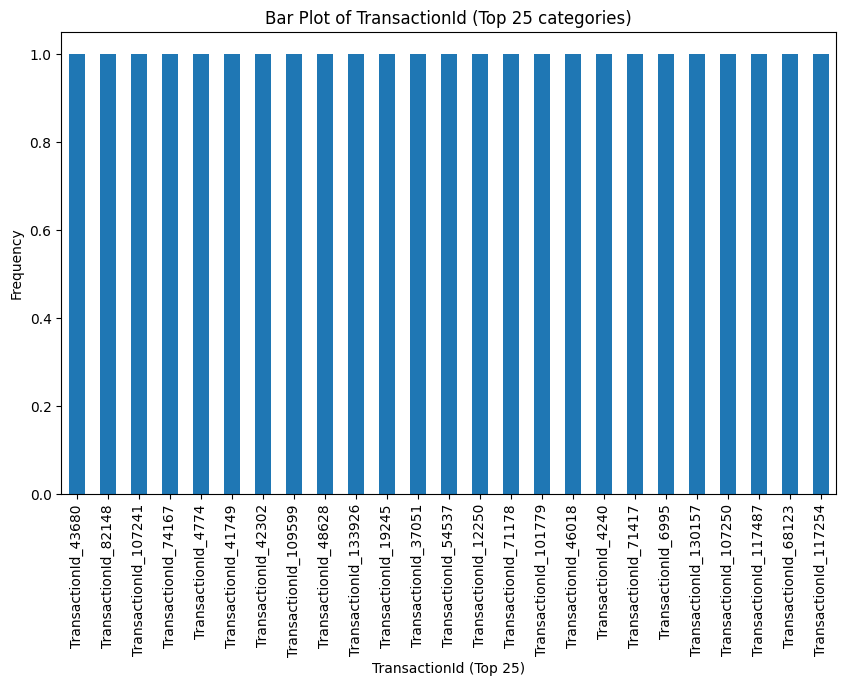




Analysis for column: BatchId


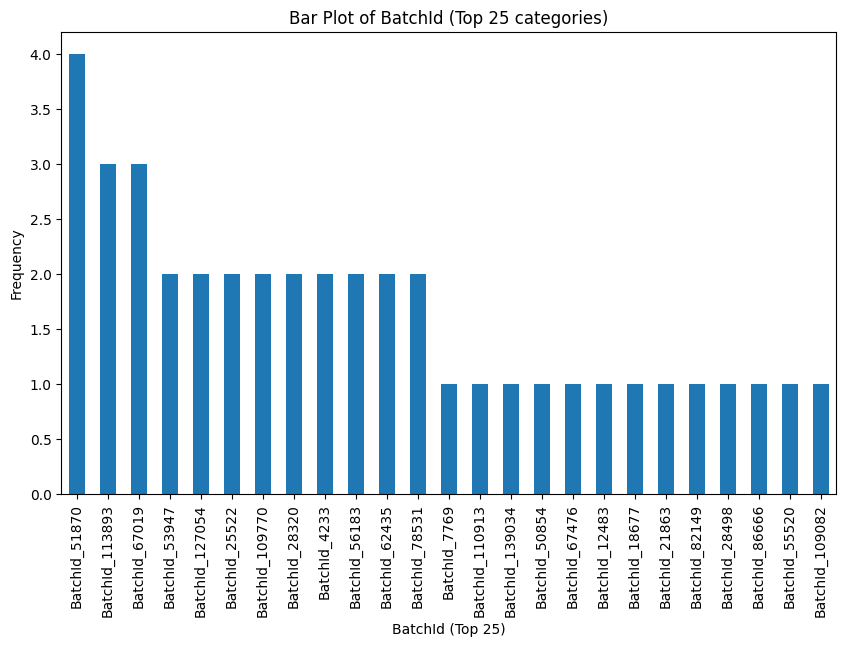




Analysis for column: AccountId


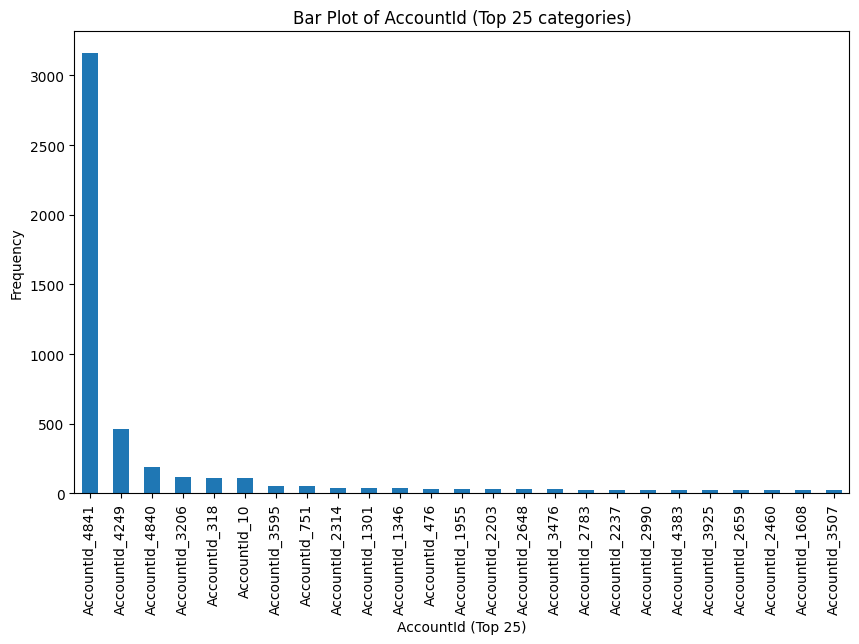




Analysis for column: SubscriptionId


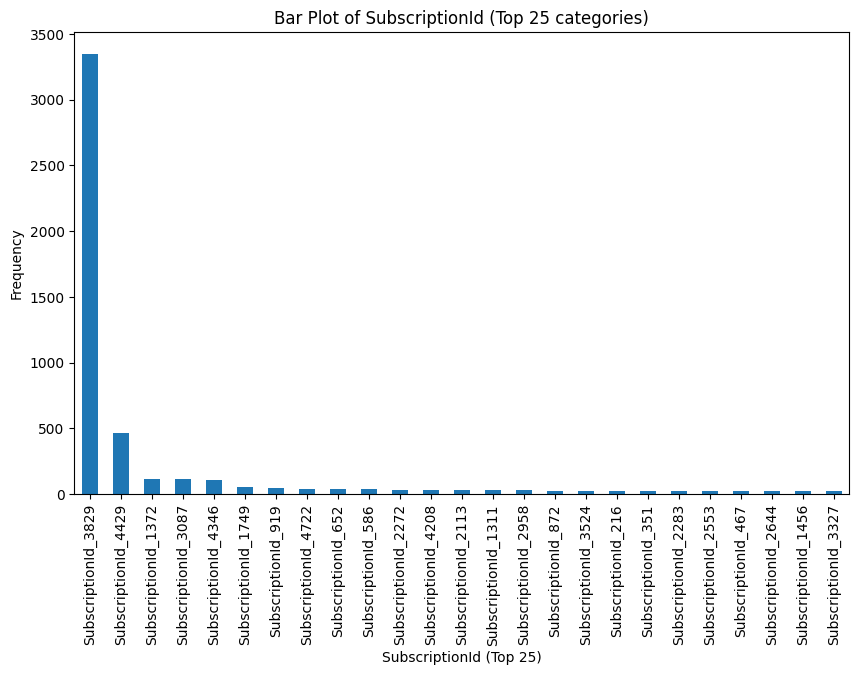




Analysis for column: CustomerId


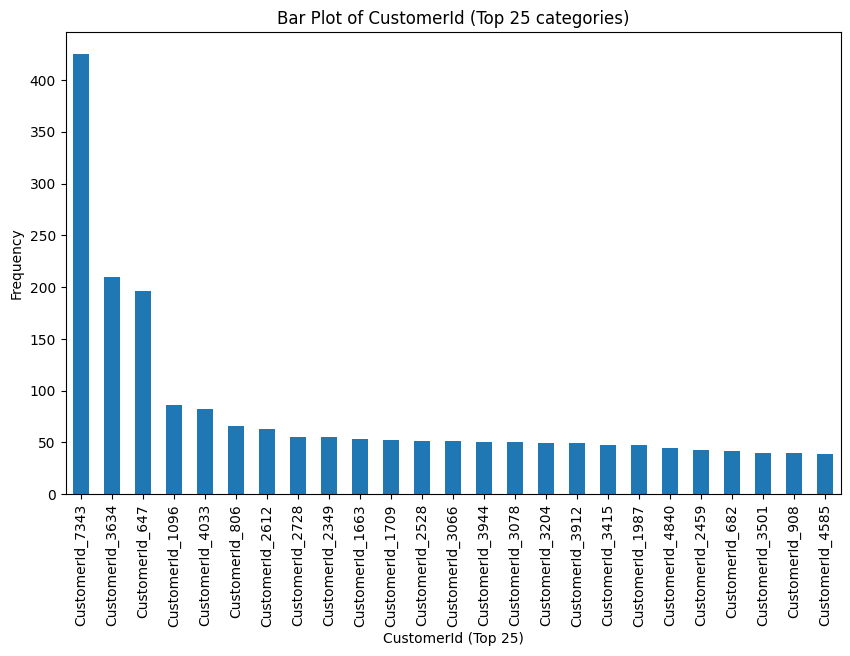




Analysis for column: CurrencyCode


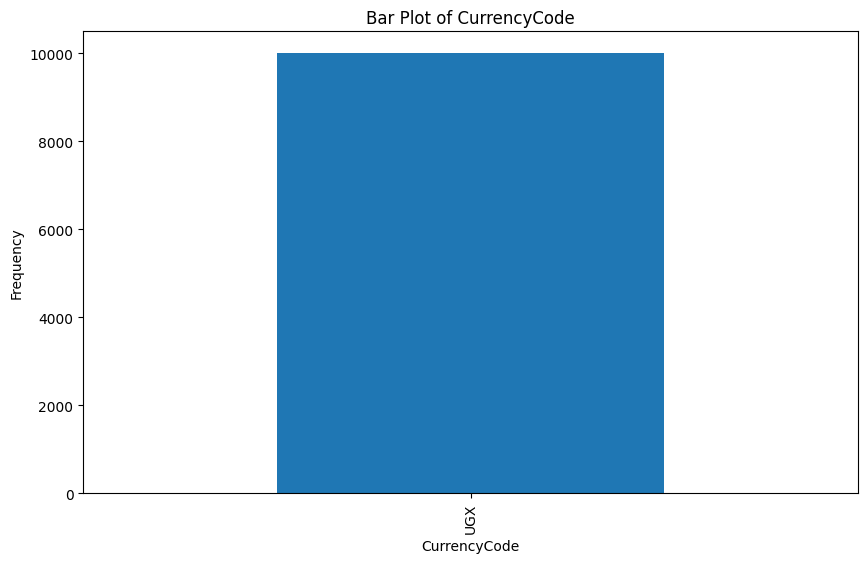




Analysis for column: CountryCode


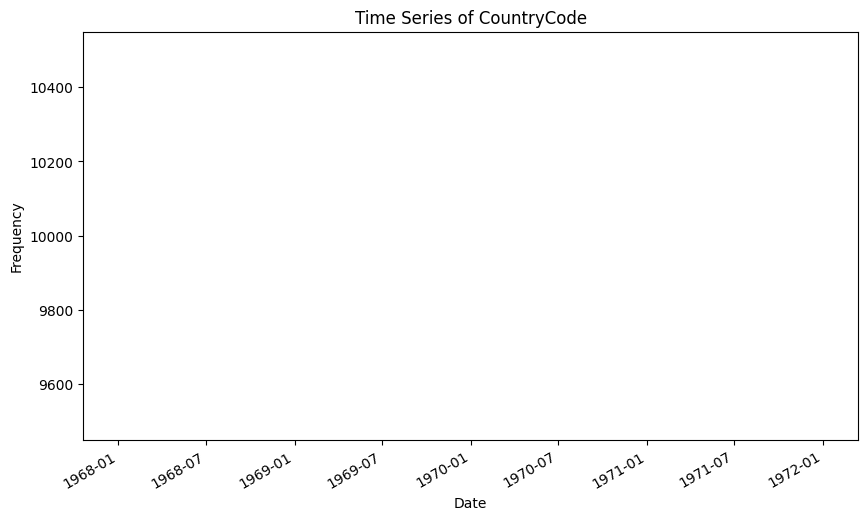




Analysis for column: ProviderId


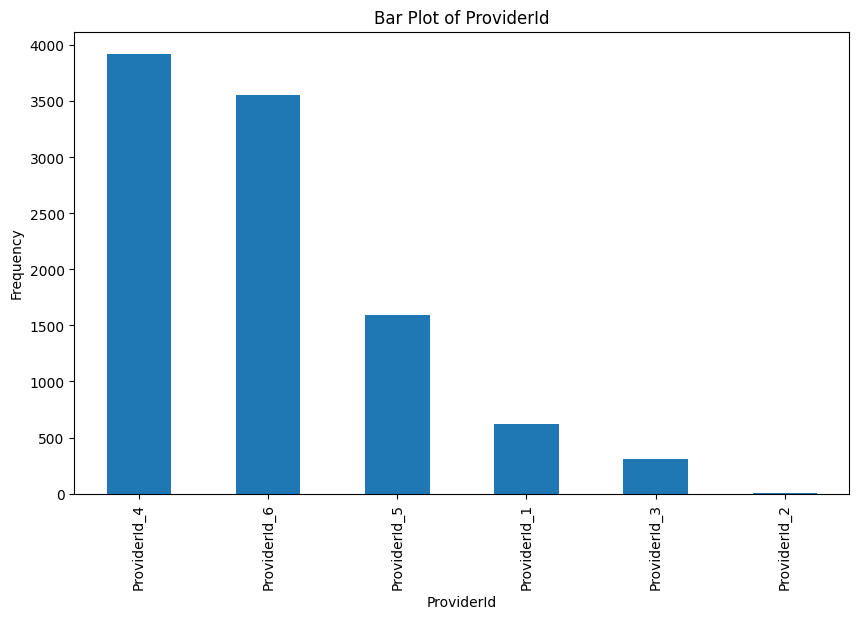




Analysis for column: ProductId


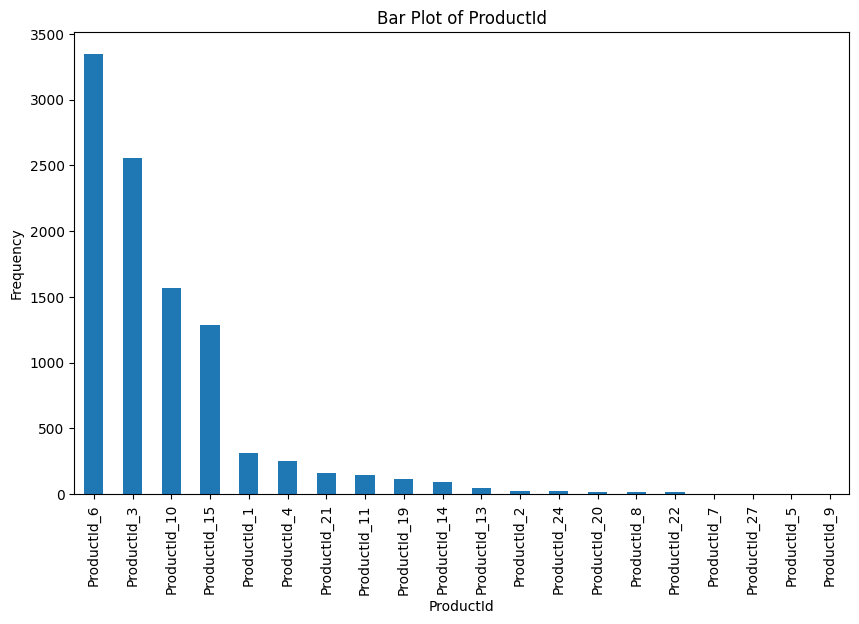




Analysis for column: ProductCategory


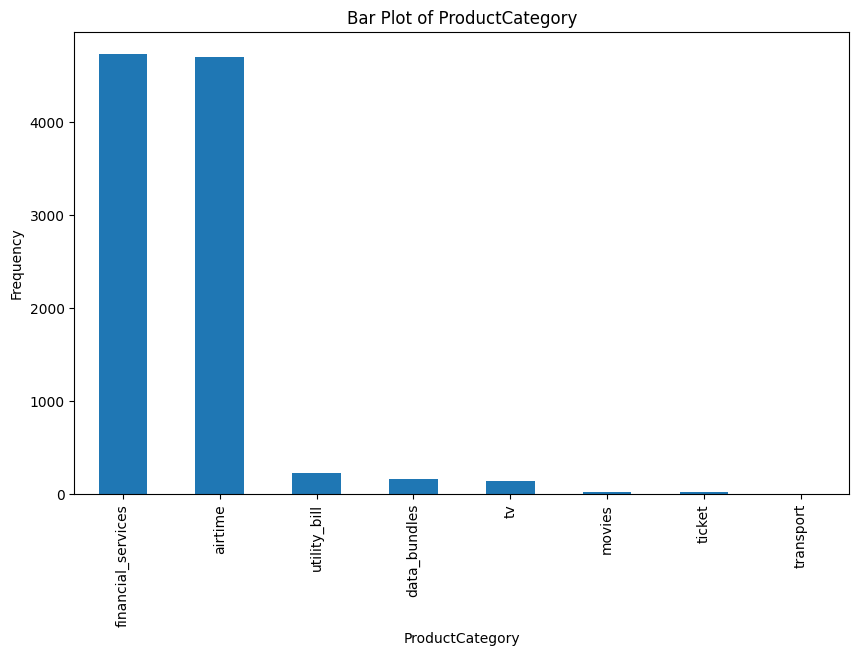




Analysis for column: ChannelId


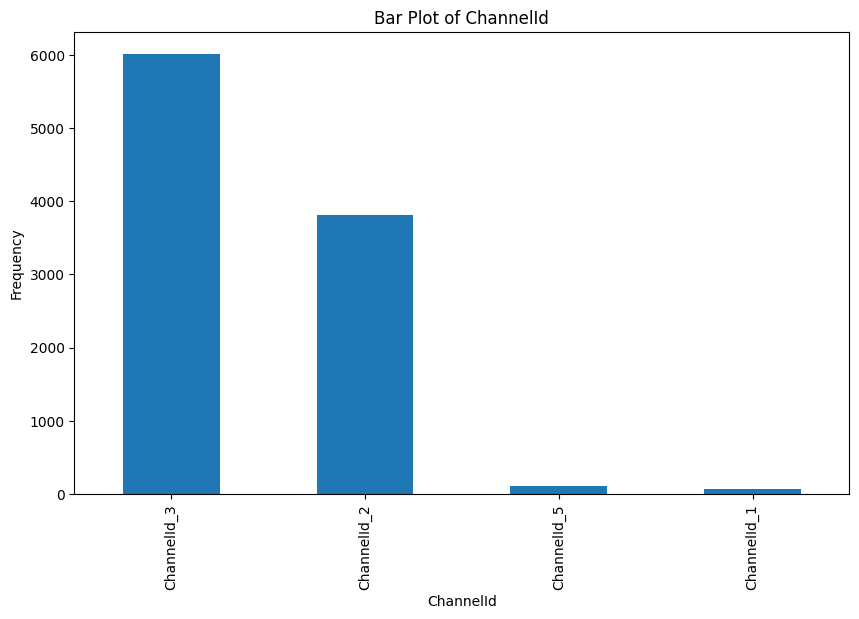




Analysis for column: Amount


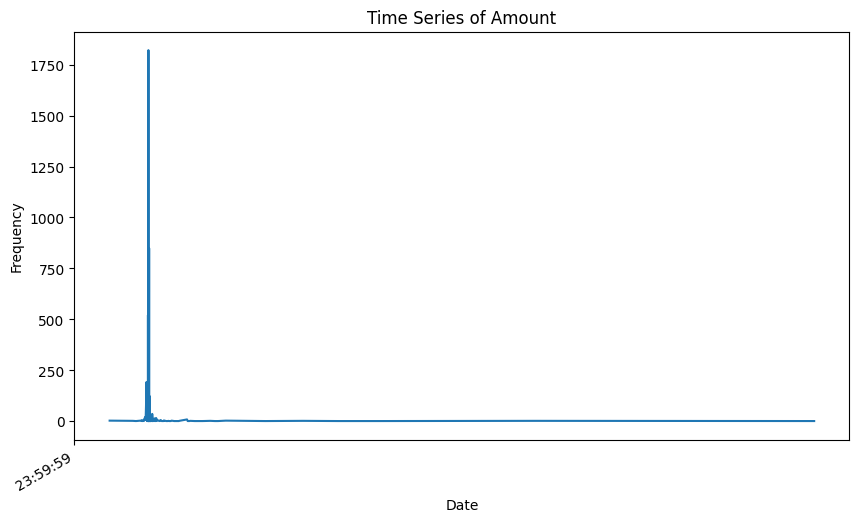




Analysis for column: Value


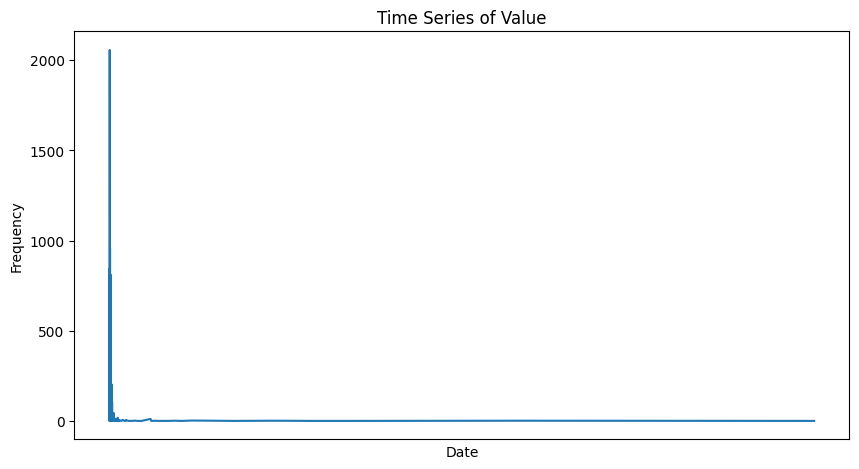




Analysis for column: TransactionStartTime


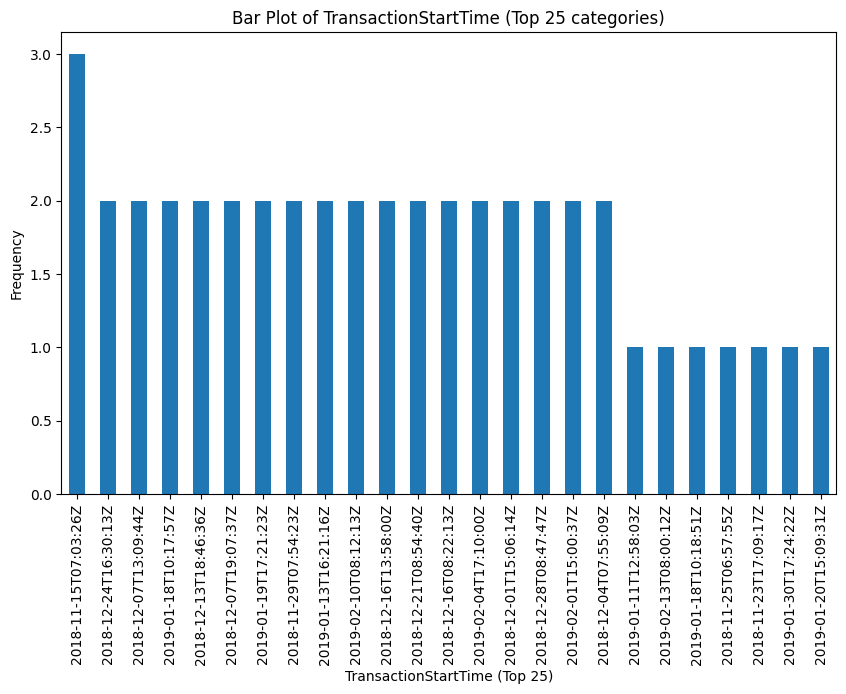




Analysis for column: PricingStrategy


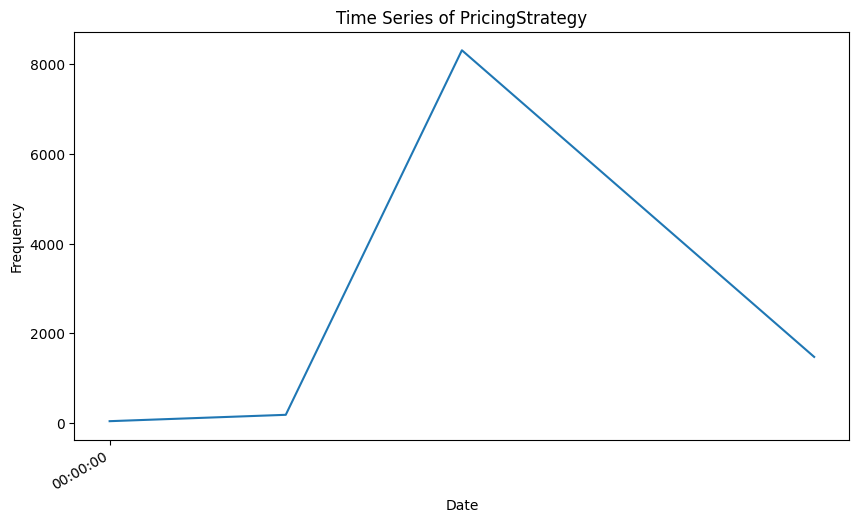




Analysis for column: FraudResult


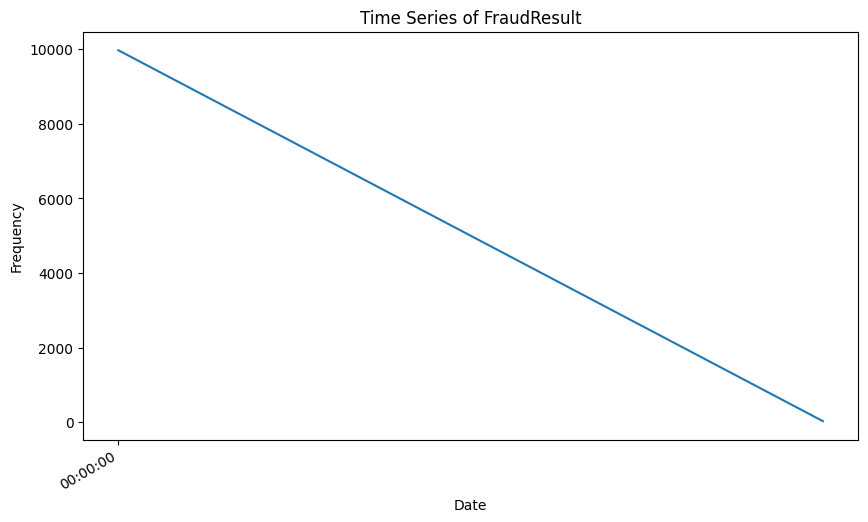

In [14]:
def univariate_analysis(df):
    def analyze_column(column):
        print(f"Analysis for column: {column.name}")

        # Visualization
        plt.figure(figsize=(10, 6))

        if pd.api.types.is_numeric_dtype(column):
            sns.histplot(column, kde=True, bins=30)
            plt.title(f'Histogram of {column.name}')
            plt.xlabel(column.name)
            plt.ylabel('Frequency')
        elif pd.api.types.is_datetime64_any_dtype(column):
            column.value_counts().sort_index().plot(kind='line')
            plt.title(f'Time Series of {column.name}')
            plt.xlabel('Date')
            plt.ylabel('Frequency')
        else:
            # Limiting to top 20 categories to avoid clutter
            value_counts = column.value_counts()
            top_categories = value_counts[:25]
            top_categories.plot(kind='bar')
            plt.title(f'Bar Plot of {column.name}')
            plt.xlabel(column.name)
            plt.ylabel('Frequency')
            if len(value_counts) > 25:
                plt.title(f'Bar Plot of {column.name} (Top 25 categories)')
                plt.xlabel(f'{column.name} (Top 25)')
                plt.ylabel('Frequency')

        plt.show()
        print("\n\n")

    # Sampling the data if too large
    if len(df) > 10000:
        df_sample = df.sample(10000)
    else:
        df_sample = df

    for column in df_sample.columns:
        analyze_column(df_sample[column])

# Assuming df is your DataFrame
univariate_analysis(data)

# Correlation Analysis
- Understanding the relationship between numerical features.


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   TransactionId         95662 non-null  object        
 1   BatchId               95662 non-null  object        
 2   AccountId             95662 non-null  object        
 3   SubscriptionId        95662 non-null  object        
 4   CustomerId            95662 non-null  object        
 5   CurrencyCode          95662 non-null  object        
 6   CountryCode           95662 non-null  datetime64[ns]
 7   ProviderId            95662 non-null  object        
 8   ProductId             95662 non-null  object        
 9   ProductCategory       95662 non-null  object        
 10  ChannelId             95662 non-null  object        
 11  Amount                95662 non-null  datetime64[ns]
 12  Value                 95662 non-null  datetime64[ns]
 13  TransactionStart

In [22]:
# Convert the column to float
data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')

In [23]:
# Convert the column to float
data['Value'] = pd.to_numeric(data['Value'], errors='coerce')

In [24]:
# Convert the column to float
data['FraudResult'] = pd.to_numeric(data['FraudResult'], errors='coerce')

In [25]:
catagorical_columns = ['ProviderId', 'ProductId', 'ProductCategory', 'PricingStrategy', 'ChannelId','FraudResult']
selected_columns = ['Amount', 'Value','FraudResult']
# Perform correlation analysis on selected columns
correlation_matrix = data[selected_columns].corr()

# Print correlation matrix
print("Correlation Matrix:")
correlation_matrix

Correlation Matrix:


,Amount,Value,FraudResult
Amount,1.000000,0.989692,0.557370
Value,0.989692,1.000000,0.566739
FraudResult,0.557370,0.566739,1.000000


In [26]:
# Function to infer and convert column data type after removing null values
def convert_column_dtype(df):
    for column in df.columns:
        non_null_data = df[column].dropna()

        if not non_null_data.empty:
            inferred_type = pd.api.types.infer_dtype(non_null_data)

            if inferred_type == 'string':
                df[column] = df[column].astype(str)
            elif inferred_type in ['integer', 'mixed-integer']:
                df[column] = pd.to_numeric(df[column], errors='coerce', downcast='integer')
            elif inferred_type in ['floating', 'mixed-integer-float']:
                df[column] = pd.to_numeric(df[column], errors='coerce')
            elif inferred_type == 'boolean':
                df[column] = df[column].astype(bool)
            elif inferred_type in ['datetime', 'date', 'timedelta']:
                df[column] = pd.to_datetime(df[column], errors='coerce')
            else:
                df[column] = df[column].astype('object')

    return df

# Convert data types of columns in the DataFrame
data = convert_column_dtype(data)

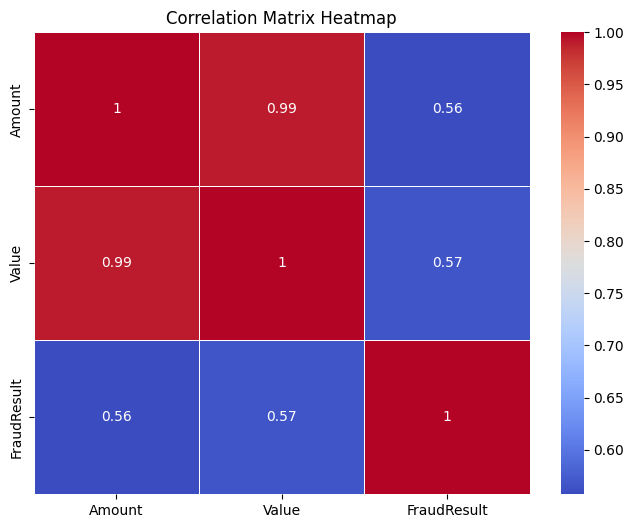

In [27]:
# Draw a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Outlier Detection
- Use box plots to identify outliers.


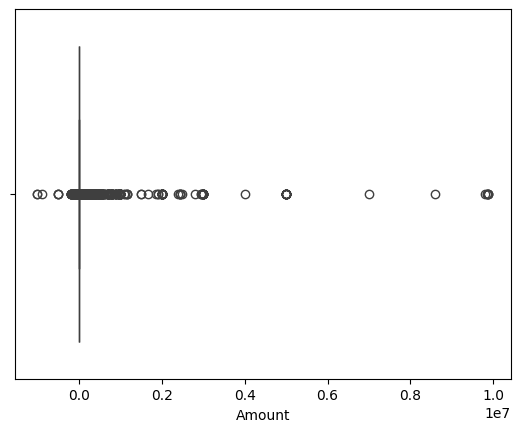

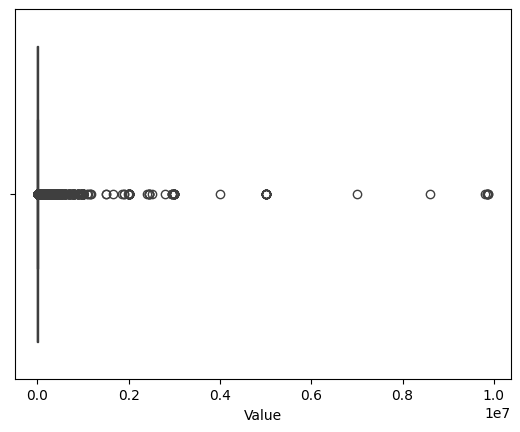

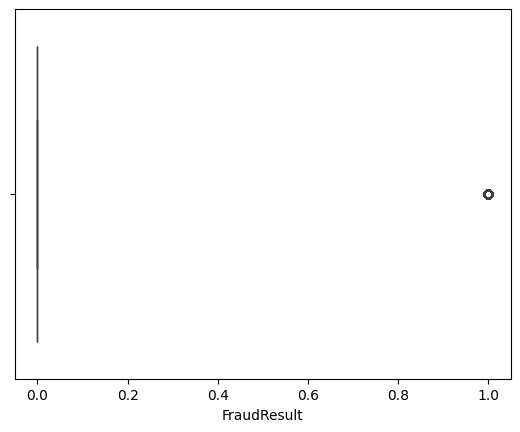

In [28]:
for col in selected_columns:
    sns.boxplot(x=data[col])
    plt.show()


In [29]:
def detect_outliers(df):
    # Iterate over each numeric column
    for col in df.select_dtypes(include='number'):
        # Plotting boxplot
        plt.figure(figsize=(10, 6))
        plt.boxplot(df[col], vert=False)
        plt.xlabel(col)
        plt.title(f'Boxplot for {col}')
        plt.show()

        # Detecting outliers using IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f"Outliers detected in {col}:")
        print(outliers)
        print('\n')

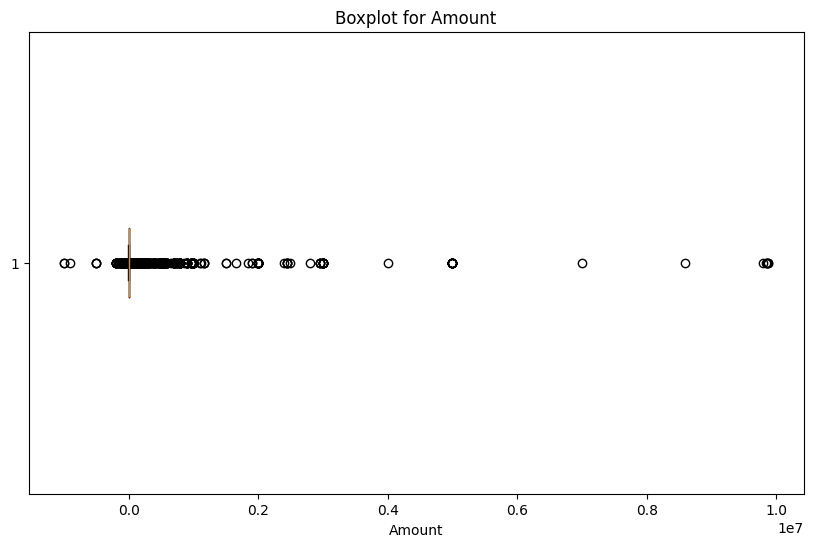

Outliers detected in Amount:
              TransactionId         BatchId       AccountId  \
3         TransactionId_380  BatchId_102363   AccountId_648   
6      TransactionId_118063  BatchId_118460  AccountId_2442   
32       TransactionId_5351  BatchId_110904  AccountId_2540   
39     TransactionId_104700   BatchId_55274  AccountId_2126   
40      TransactionId_13858   BatchId_86043  AccountId_2126   
...                     ...             ...             ...   
95633   TransactionId_66516   BatchId_98969  AccountId_3014   
95638   TransactionId_20690   BatchId_18591  AccountId_1232   
95640  TransactionId_131580   BatchId_16209  AccountId_1219   
95643  TransactionId_114220   BatchId_89378  AccountId_1318   
95656   TransactionId_68402   BatchId_17092  AccountId_2659   

            SubscriptionId       CustomerId CurrencyCode  \
3      SubscriptionId_2185   CustomerId_988          UGX   
6      SubscriptionId_1980  CustomerId_2858          UGX   
32      SubscriptionId_671  Custom

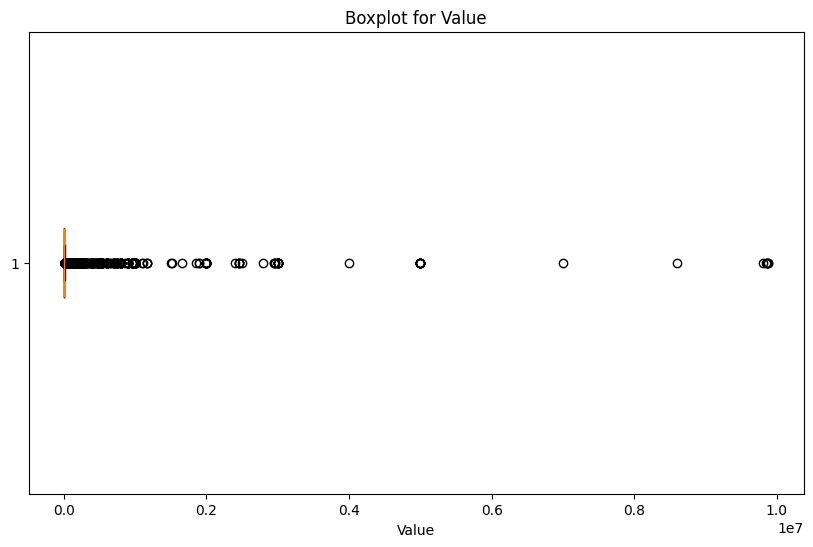

Outliers detected in Value:
              TransactionId         BatchId       AccountId  \
3         TransactionId_380  BatchId_102363   AccountId_648   
52      TransactionId_38396  BatchId_110362  AccountId_2744   
57      TransactionId_72438    BatchId_3221  AccountId_2744   
110     TransactionId_50492   BatchId_29008   AccountId_946   
114     TransactionId_74700   BatchId_72777   AccountId_946   
...                     ...             ...             ...   
95633   TransactionId_66516   BatchId_98969  AccountId_3014   
95638   TransactionId_20690   BatchId_18591  AccountId_1232   
95640  TransactionId_131580   BatchId_16209  AccountId_1219   
95643  TransactionId_114220   BatchId_89378  AccountId_1318   
95656   TransactionId_68402   BatchId_17092  AccountId_2659   

            SubscriptionId       CustomerId CurrencyCode  \
3      SubscriptionId_2185   CustomerId_988          UGX   
52     SubscriptionId_1665  CustomerId_3165          UGX   
57     SubscriptionId_1665  Custome

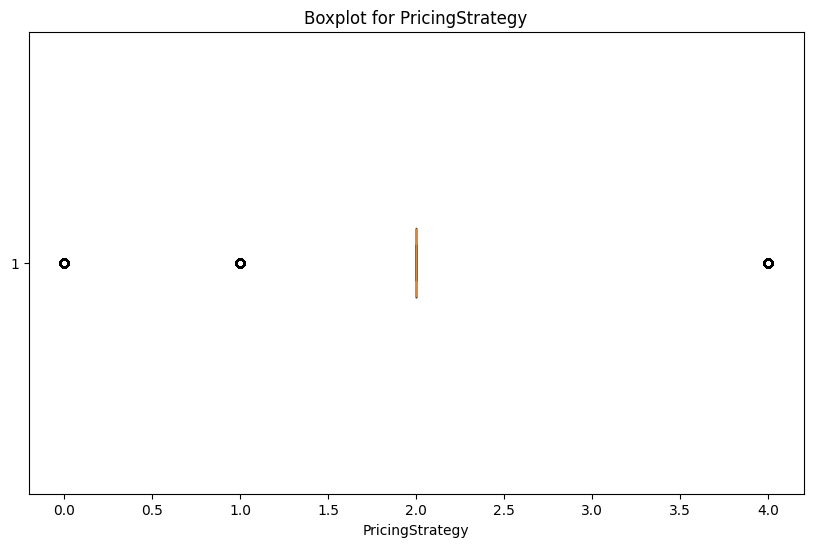

Outliers detected in PricingStrategy:
              TransactionId         BatchId       AccountId  \
6      TransactionId_118063  BatchId_118460  AccountId_2442   
19     TransactionId_119821   BatchId_89644  AccountId_3081   
21      TransactionId_93543  BatchId_103527  AccountId_3081   
46      TransactionId_16043   BatchId_22708  AccountId_1842   
58      TransactionId_92309   BatchId_91367  AccountId_1523   
...                     ...             ...             ...   
95605   TransactionId_89897   BatchId_81212   AccountId_769   
95610  TransactionId_121241    BatchId_1991  AccountId_3327   
95634    TransactionId_5394  BatchId_121783  AccountId_2965   
95635   TransactionId_11513   BatchId_25909  AccountId_2585   
95645  TransactionId_131922   BatchId_69178  AccountId_1726   

            SubscriptionId       CustomerId CurrencyCode  \
6      SubscriptionId_1980  CustomerId_2858          UGX   
19     SubscriptionId_4312  CustomerId_3507          UGX   
21     SubscriptionId_431

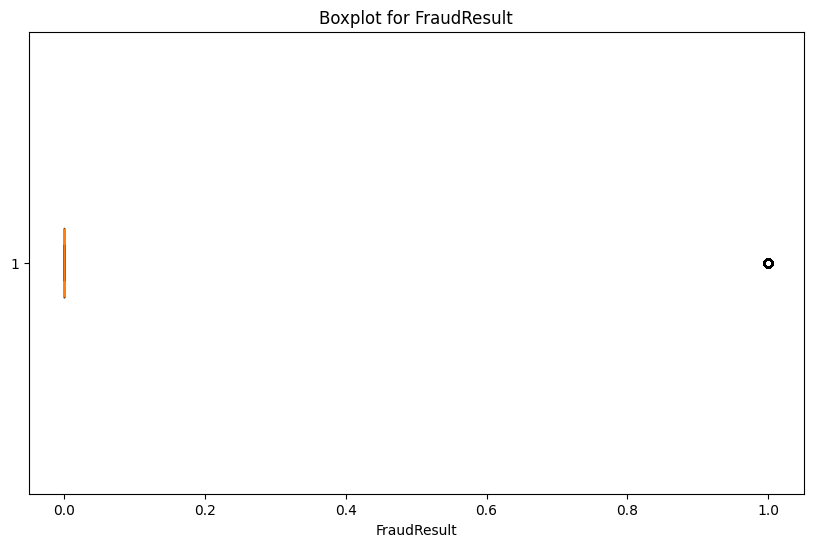

Outliers detected in FraudResult:
              TransactionId         BatchId       AccountId  \
131     TransactionId_60873   BatchId_93685  AccountId_3832   
146     TransactionId_28016  BatchId_125553  AccountId_2366   
155      TransactionId_1149   BatchId_10381  AccountId_3832   
2376   TransactionId_136904   BatchId_52644  AccountId_3692   
2452    TransactionId_88818   BatchId_54481  AccountId_3832   
...                     ...             ...             ...   
94805   TransactionId_69673  BatchId_111976  AccountId_4687   
95108  TransactionId_128664  BatchId_128748  AccountId_1909   
95262   TransactionId_33086   BatchId_40160  AccountId_1909   
95264  TransactionId_100613   BatchId_40160  AccountId_1909   
95268   TransactionId_44276   BatchId_19378  AccountId_1909   

            SubscriptionId       CustomerId CurrencyCode  \
131    SubscriptionId_4161  CustomerId_4275          UGX   
146    SubscriptionId_4834  CustomerId_7414          UGX   
155    SubscriptionId_4161  C

In [30]:
detect_outliers(data)